New Question Idea: What if we could predict whether a team was going to win a challenge? Possible features: challenge type: Immunity or Reward Number of Players on Team: Number of Players on opposing Team: % of women on team: Number of Challenges Previously Won: or Whether last challenge was won or lost: weather: Win or Loss: Average age of castaways on the team: type of challenge:

# Data Cleaning

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [117]:
castaways = pd.read_csv("castaways.csv")
challenges = pd.read_csv("challenges.csv")
viewers = pd.read_csv("viewers.csv")
gender = pd.read_csv("SurvivorPlayersCaunceTypes1636556879.csv")
ind_chall = pd.read_csv("ind_chall.csv")

In [118]:
castaways['win'] = castaways.result.apply(lambda x: 1 if x == "Sole Survivor" else 0)
castaways.castaway_id = castaways.castaway_id.astype(object)
#castaways.win = castaways.win.astype(object)

In [119]:
gender['full_name'] = gender['First Name'] + " " + gender[' Last Name']
gender = gender[['full_name', ' Sex']]

In [120]:
castaways = castaways[['castaway_id','full_name', 'age', 'personality_type', 'state', 'win']]

In [121]:
cast = pd.merge(castaways, gender)
cast = cast.dropna()

In [122]:
cast

,castaway_id,full_name,age,personality_type,state,win,Sex
0,1,Sonja Christopher,63,ENFP,California,0,F
1,3,Stacey Stillman,27,ENTJ,California,0,F
2,4,Ramona Gray,29,ISTJ,New Jersey,0,F
3,5,Dirk Been,23,ISFP,Wisconsin,0,M
4,6,Joel Klug,27,ESTJ,Arkansas,0,M
...,...,...,...,...,...,...,...
885,533,Angela Perkins,42,ISTJ,Ohio,0,F
886,534,Laurel Johnson,29,INTP,Minnesota,0,F
887,535,Domenick Abbate,38,ESTP,New York,0,M
888,536,Wendell Holland,33,INFJ,Pennsylvania,1,M


# Exploratory Data Analysis

In [123]:
percent_wins = cast.groupby(['personality_type', 'state', ' Sex']).mean().reset_index()
percent_wins.sort_values(by = 'win', axis = 0, ascending = False).head(20)

,personality_type,state,Sex,age,win
166,ESTP,Washington,F,29.000000,1.000000
178,INFJ,Texas,F,29.000000,1.000000
42,ENFP,Utah,M,22.000000,1.000000
67,ENTP,Ohio,M,33.000000,1.000000
229,ISFJ,Arkansas,F,26.000000,1.000000
259,ISFP,Massachusetts,M,28.666667,0.666667
100,ESFP,Idaho,M,35.000000,0.500000
310,ISTP,Pennsylvania,F,21.500000,0.500000
4,ENFJ,Kansas,F,36.000000,0.500000
161,ESTP,Texas,M,31.000000,0.500000


In [131]:
state_wins = cast[['win', 'state']].groupby(['state']).mean().reset_index()

<AxesSubplot:xlabel='win', ylabel='state'>

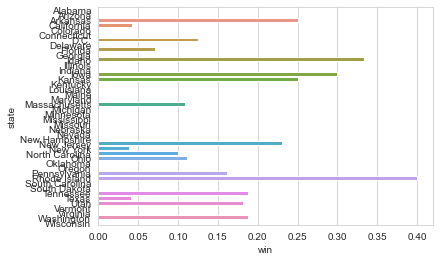

In [144]:
sns.barplot(x = 'win', y = 'state', data = state_wins)

<AxesSubplot:xlabel='win', ylabel='age'>

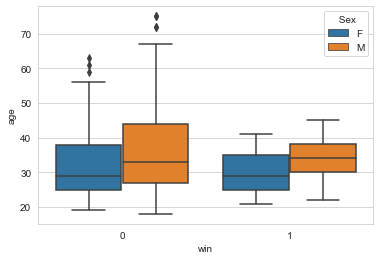

In [151]:
sns.boxplot(x = 'win', y = 'age', data = cast, hue = ' Sex')

<AxesSubplot:xlabel='win', ylabel='personality_type'>

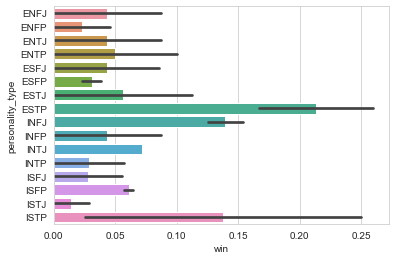

In [149]:
pers_sex_int = cast[['personality_type', ' Sex', 'win']].groupby(['personality_type', ' Sex']).mean().reset_index()
sns.barplot(x = 'win', y = 'personality_type', data = pers_sex_int)

<AxesSubplot:xlabel='personality_type', ylabel='win'>

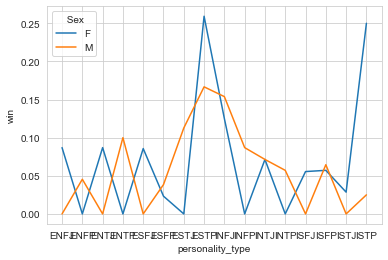

In [150]:
sns.lineplot(x = 'personality_type', y = 'win', data = pers_sex_int, hue = ' Sex')

# Modeling

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier     
from sklearn import tree, preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 

In [78]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
pers_encoded=le.fit_transform(cast['personality_type'])
state_encoded=le.fit_transform(cast['state'])
test_encoded=le.fit_transform(cast[' Sex'])

cast['personality_type'] = pers_encoded
cast['state'] = state_encoded
cast[' Sex'] = test_encoded
cast

,castaway_id,full_name,age,personality_type,state,win,Sex
0,1,Sonja Christopher,63,1,3,0,0
1,3,Stacey Stillman,27,2,3,0,0
2,4,Ramona Gray,29,14,27,0,0
3,5,Dirk Been,23,13,43,0,1
4,6,Joel Klug,27,6,2,0,1
...,...,...,...,...,...,...,...
885,533,Angela Perkins,42,14,30,0,0
886,534,Laurel Johnson,29,11,21,0,0
887,535,Domenick Abbate,38,7,28,0,1
888,536,Wendell Holland,33,8,33,1,1


In [79]:
Y = cast.win
X = cast[['age', 'personality_type', 'state', ' Sex']]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=713, test_size=0.4)

In [81]:
nb = MultinomialNB()

In [82]:
def hw (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    y_prob_test = model.predict_proba(X_test)[:,1]
    y_prob_train = model.predict_proba(X_test)[:,1]
    train_accuracy = metrics.accuracy_score(y_train, y_hat_train)
    test_accuracy = metrics.accuracy_score(y_test, y_hat_test)
    f1_test = metrics.f1_score(y_test, y_hat_test)
    f1_train = metrics.f1_score(y_train, y_hat_train)
    auc_test = roc_auc_score(y_test, y_prob_test)
    auc_train = roc_auc_score(y_test, y_prob_train)
    total = {'accuracy': [train_accuracy,test_accuracy], 'F1':[f1_train, f1_test], 'AUC': [auc_train, auc_test] }
    df = pd.DataFrame.from_dict(total, orient = 'index', columns = ['train', 'test'])
    return [df, y_prob_test]

In [83]:
nb_res = hw(nb, X_train, y_train, X_test, y_test)
nb_res[0]

,train,test
accuracy,0.793233,0.794366
F1,0.126984,0.141176
AUC,0.654449,0.654449


In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_prob)

In [84]:
lr = LogisticRegression(solver='liblinear', C=1)
lr_res = hw(lr, X_train, y_train, X_test, y_test)
lr_res[0]

,train,test
accuracy,0.926692,0.946479
F1,0.000000,0.000000
AUC,0.622024,0.622024


In [87]:
dc = DecisionTreeClassifier()
all_scores = []
tree_depth = np.arange(2,30)
for d in tree_depth:
    tree = DecisionTreeClassifier(max_depth=d) 
    scores = cross_val_score(tree,X_train,y_train, cv=10) 
    all_scores.append(scores.mean())
n_depth = tree_depth[np.argmax(all_scores)]
print(n_depth)

7


In [88]:
dc = DecisionTreeClassifier(max_depth = n_depth)
dc_res = hw(dc, X_train, y_train, X_test, y_test)
dc_res[0]

,train,test
accuracy,0.954887,0.938028
F1,0.571429,0.083333
AUC,0.795504,0.795504


In [89]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3)
rf_res = hw(rf, X_train, y_train, X_test, y_test)
rf_res[0]

,train,test
accuracy,0.926692,0.946479
F1,0.000000,0.000000
AUC,0.799655,0.799655


In [90]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=.1)
gb_res = hw(gb, X_train, y_train, X_test, y_test)
gb_res[0]

,train,test
accuracy,0.958647,0.940845
F1,0.620690,0.086957
AUC,0.865602,0.865602


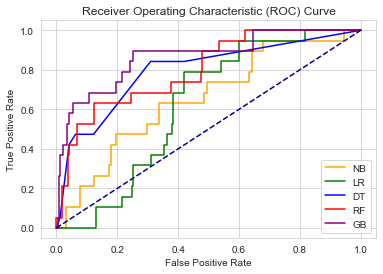

In [93]:
fpr, tpr, thresh = roc_curve(y_test, nb_res[1])
fpr_l, tpr_l, thresh_l = roc_curve(y_test, lr_res[1])
fpr_2, tpr_2, thresh_2 = roc_curve(y_test, dc_res[1])
fpr_3, tpr_3, thresh_3 = roc_curve(y_test, rf_res[1])
fpr_4, tpr_4, thresh_4 = roc_curve(y_test, gb_res[1])

plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_l, tpr_l, color='green', label='LR')
plt.plot(fpr_2, tpr_2, color='blue', label='DT')
plt.plot(fpr_3, tpr_3, color='red', label='RF')
plt.plot(fpr_4, tpr_4, color='purple', label='GB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Results

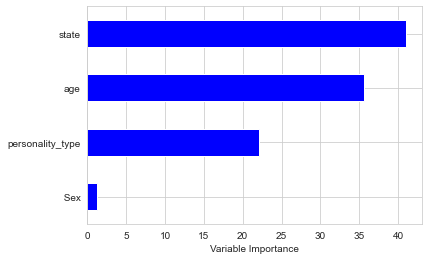

In [97]:
Importance = pd.DataFrame({'Importance':gb.feature_importances_*100}, index=X.columns)
Importance = Importance.iloc[gb.feature_importances_ > 0,:]
Importance = Importance.sort_values('Importance', axis=0, ascending=True)
Importance.plot(kind='barh', color='b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None